In [1]:
from CausalModule import CausalModule
# from run_effect_estimation import run_effect_estimation
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/anaconda3/envs/iocp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# data_url = "https://raw.githubusercontent.com/FenTechSolutions/CausalDiscoveryToolbox/master/cdt/data/resources/cyto_full_data.csv"
# data = pd.read_csv(data_url) 
import dowhy.datasets
dataset = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=True,
        stddev_treatment_noise=10)
data = dataset['df']
data['v0'] = data['v0'].astype(int)
data['y'] = data['y'].astype(int)
print(data.head())
print(dataset['treatment_name'])
print(dataset['outcome_name'])
discovery_algorithm = "pc" 
treatment_variable = dataset['treatment_name'][0]
outcome_variable = dataset['outcome_name'][0]

treatment_value = 1
control_value = 0

    Z0        Z1        W0        W1        W2        W3        W4  v0  y
0  0.0  0.337227 -0.899613 -0.284996  1.712221  0.601270 -1.150440   0  1
1  1.0  0.946157 -2.743782 -0.556839  0.350795  1.502476  1.264354   1  1
2  1.0  0.127877  0.060775 -0.324249 -1.459276  0.696325 -0.548522   1  1
3  0.0  0.298791 -0.083274 -0.374887  1.153661 -0.694025 -0.469939   1  1
4  0.0  0.313036 -1.840932  1.072831 -1.221041 -1.083443 -2.010638   1  1
['v0']
y


In [3]:
print(treatment_variable)

v0


2025-08-22 00:50:47,217 INFO: CausalModule initialized with provided parameters.
2025-08-22 00:50:47,219 INFO: Finding causal graph using pc algorithm
Depth=5, working on node 8: 100%|██████████| 9/9 [00:00<00:00, 2985.03it/s]


['Z0', 'Z1', 'W0', 'W1', 'W2', 'W3', 'W4', 'v0', 'y']


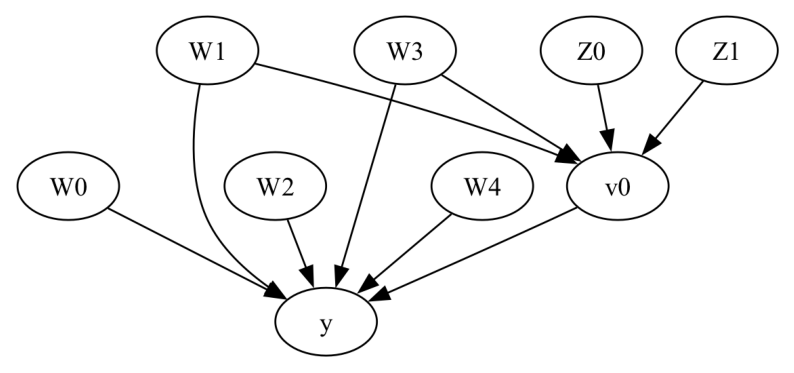

2025-08-22 00:50:47,760 INFO: Creating a causal model from the discovered/given causal graph
2025-08-22 00:50:47,762 INFO: Model to find the causal effect of treatment ['v0'] on outcome ['y']
2025-08-22 00:50:47,762 INFO: Identifying the effect estimand of the treatment on the outcome variable
2025-08-22 00:50:47,765 INFO: Causal effect can be identified.
2025-08-22 00:50:47,767 INFO: Instrumental variables for treatment and outcome:['Z0', 'Z1']
2025-08-22 00:50:47,769 INFO: Frontdoor variables for treatment and outcome:[]
2025-08-22 00:50:47,769 INFO: Estimating the effect of the treatment on the outcome variable
2025-08-22 00:50:47,770 INFO: linear_regression
2025-08-22 00:50:47,770 INFO: INFO: Using Linear Regression Estimator
2025-08-22 00:50:47,773 INFO: b: y~v0+W3+W1+v0*W2+v0*W4+v0*W0
2025-08-22 00:50:48,101 INFO: Note that it is ok for your treatment to be a continuous variable, DoWhy automatically discretizes at the backend.
2025-08-22 00:50:48,103 INFO: =======================

In [4]:
# Initialize the CausalModule with the provided parameters
causal_module = CausalModule(
    data=data,
    treatment_variable=treatment_variable,
    outcome_variable=outcome_variable,
)

# Find the causal graph
causal_module.find_causal_graph(algo=discovery_algorithm)
print(causal_module.graph.nodes())
# Refute the causal graph
# causal_module.refute_cgm(n_perm=10)
causal_module.see_graph()

# Create a causal graph model
causal_module.create_model()
# Identify the estimand
causal_module.identify_effect(method_name='default')
# Estimate the effect
causal_module.estimate_effect(ctrl_val=control_value, trtm_val=treatment_value)
# Refute the estimate
# causal_module.refute_estimate()

# Save results to CSV (default directory is 'outputs/results')
causal_module.store_results()

In [11]:
causal_module.results.keys()

dict_keys(['graph_properties', 'node_quality_score', 'graph_quality_score', 'graph_quality_summary', 'effect_estimate'])

In [12]:
causal_module.results['effect_estimate']

{'Effect Estimate': np.float64(0.5150567553712408),
 'Realized Estimand Expression': 'b: y~v0+W3+W1+v0*W2+v0*W4+v0*W0',
 'Treatment Value': 1,
 'Control Value': 0}